In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/out/pmid_data.csv')

# Data Visualization

In [4]:
relevance_data = data[data['search_type'] == 'relevance']
pubdate_desc_data = data[data['search_type'] == 'pubdate_desc']

In [5]:
citations_relevance = relevance_data[['query', 'search_type', 'page', 'citation_count']]

In [6]:
#Scatter plot of x vs. y in number of citations with Page 1 on one axis and Page 2 on y axis

citations_page1 = citations_relevance[citations_relevance['page'] == 1]['citation_count'].tolist()
citations_page2 = citations_relevance[citations_relevance['page'] == 2]['citation_count'].tolist()


Because RCR works only for papers published earlier than 2021, it will not be possible to compare RCR between relevance and publication date. Will see if average RCR is different between first and second page

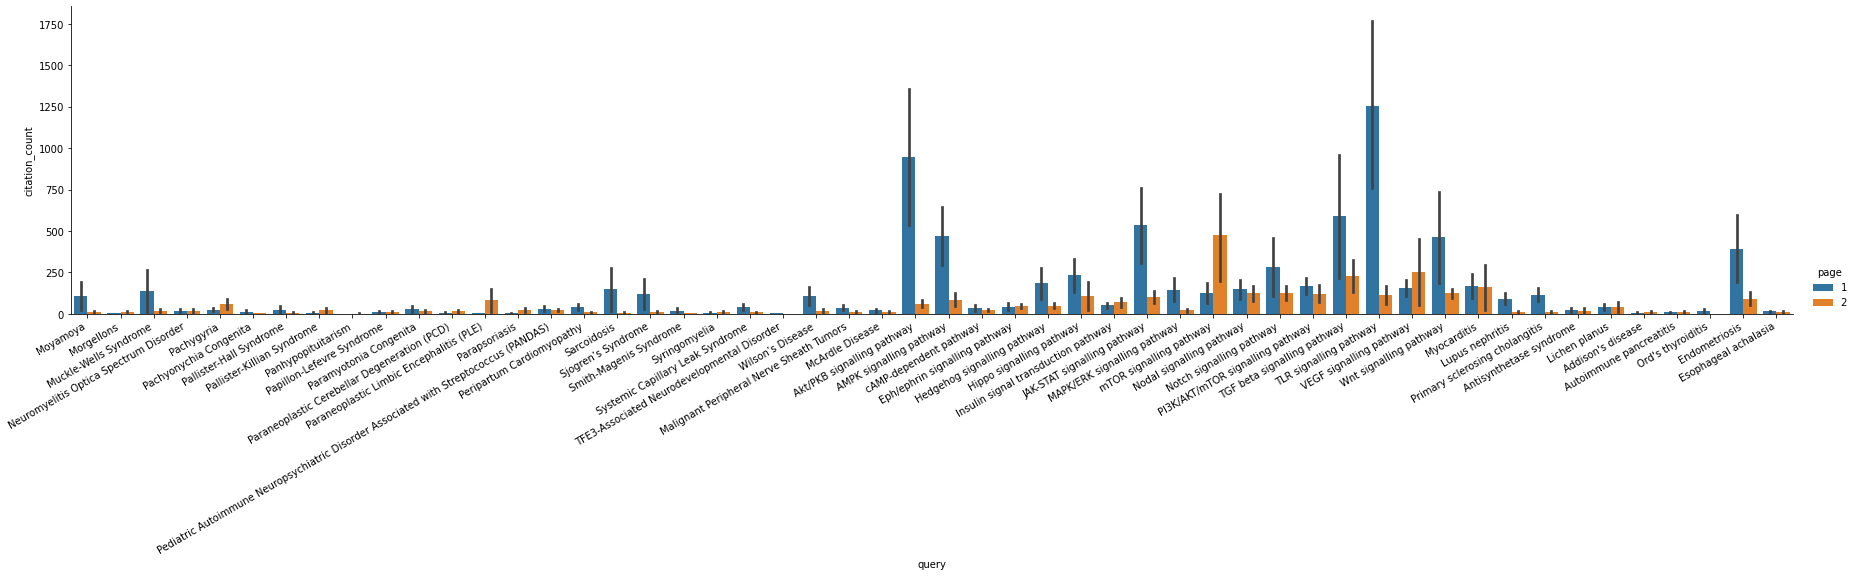

In [8]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[:1000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

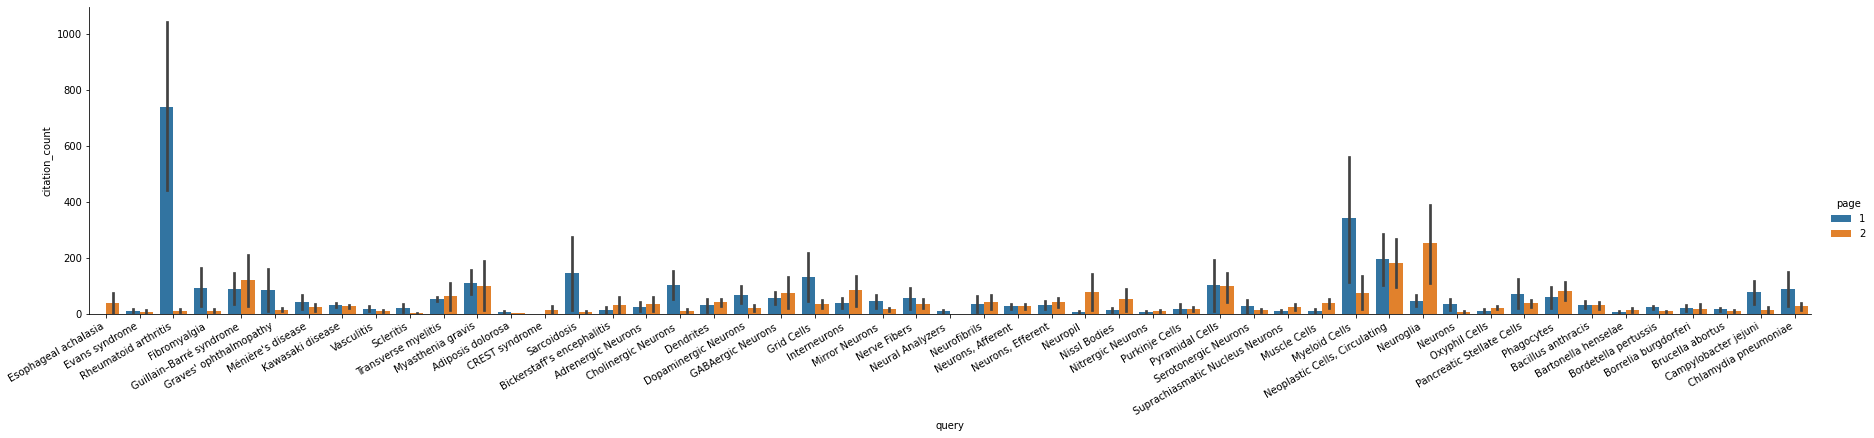

In [9]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[1000:2000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

In [10]:
biomedical_triangle = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/apt.csv')

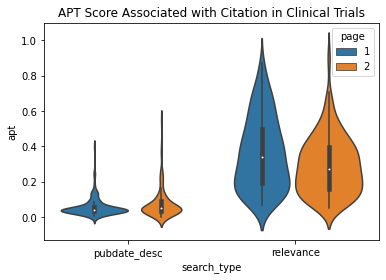

In [34]:
sns.violinplot(data=biomedical_triangle, x='search_type', y='apt', hue='page').set_title('APT Score Associated with Citation in Clinical Trials')

plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/apt_score.png', dpi=300, bbox_inches='tight')



In [17]:
country_of_origin_journal = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/country_journal.csv')

Text(0.5, 1.0, 'Country of Origin of Journal')

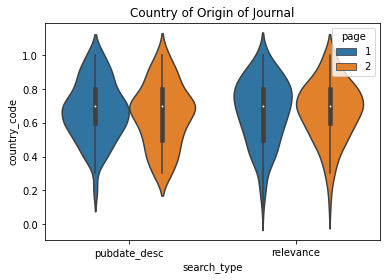

In [19]:
sns.violinplot(data=country_of_origin_journal, x='search_type', y='country_code', hue='page').set_title('Country of Origin of Journal')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/journal_country.png', dpi=300, bbox_inches='tight')


In [24]:
is_english_only = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/is_english_only.csv')
is_english_only

,query,search_type,page,is_english_only
0,AMPK signalling pathway,pubdate_desc,1,1.0
1,AMPK signalling pathway,pubdate_desc,2,1.0
2,AMPK signalling pathway,relevance,1,1.0
...,...,...,...,...
717,structural racism,pubdate_desc,2,1.0
718,structural racism,relevance,1,1.0
719,structural racism,relevance,2,1.0


Text(0.5, 1.0, 'Proportion of Query Results in English Only')

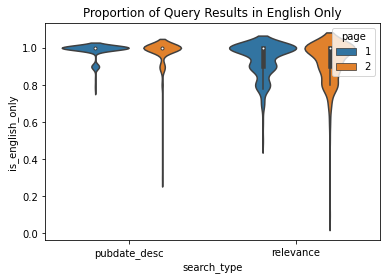

In [25]:
sns.violinplot(data=is_english_only, x='search_type', y='is_english_only', hue='page').set_title('Proportion of Query Results in English Only')


In [26]:
human_mol_cell = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/human_animal_molcellular.csv')
human_mol_cell

,query,search_type,page,human,animal,molecular_cellular
0,AMPK signalling pathway,pubdate_desc,1,0.117,0.215,0.668
1,AMPK signalling pathway,pubdate_desc,2,0.211,0.067,0.522
2,AMPK signalling pathway,relevance,1,0.196,0.241,0.564
...,...,...,...,...,...,...
717,structural racism,pubdate_desc,2,1.000,0.000,0.000
718,structural racism,relevance,1,0.875,0.025,0.100
719,structural racism,relevance,2,0.925,0.000,0.075


In [28]:
human_mol_cell_melt = human_mol_cell.melt(id_vars=['query', 'search_type', 'page'])

In [29]:
human_mol_cell_melt

,query,search_type,page,variable,value
0,AMPK signalling pathway,pubdate_desc,1,human,0.117
1,AMPK signalling pathway,pubdate_desc,2,human,0.211
2,AMPK signalling pathway,relevance,1,human,0.196
...,...,...,...,...,...
2157,structural racism,pubdate_desc,2,molecular_cellular,0.000
2158,structural racism,relevance,1,molecular_cellular,0.100
2159,structural racism,relevance,2,molecular_cellular,0.075
